#### Approximation of data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['font.size'] = 12

In [3]:
# source data
x = np.array([4, 8, 11, 14])
y = np.array([1624, 908, 567, 434])

period = 14   # number of days between injections
shift = -0.6  # shift of the moments of analysis relative to the moment of injection

In [4]:
x_shifted = x + shift

# function for approximation (sum of 3 exponents with time='period' between them)
def func(x, a, b, c):
    return a * np.exp(-b * x) + a * np.exp(-b * (x + period)) + a * np.exp(-b * (x + period * 2)) + c

# calculate coefficient of approximating curve
coefs, _ = curve_fit(func, x_shifted, y, p0=(100, 0.01, 100), maxfev = 10_000)

# display calculated coefficients
print(*coefs, sep=', ')

2424.5530187739496, 0.17574761881673298, 169.12920995730047


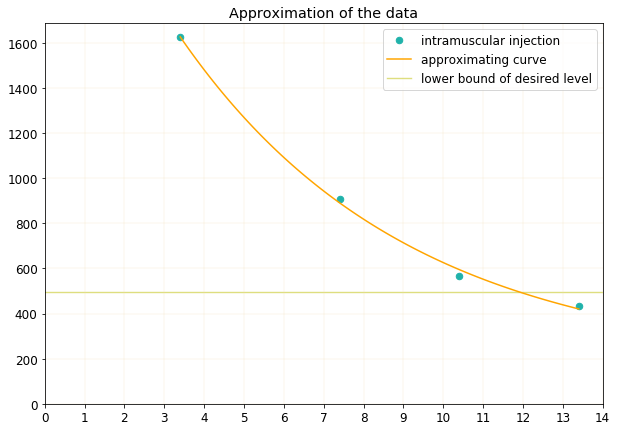

In [5]:
# plot raw data
plt.plot(x_shifted, y, color='lightseagreen', marker='.', linewidth=0, markersize=13, zorder=2,
         label='intramuscular injection')

# create and plot approximating curve
xx = np.linspace(x_shifted[0], x_shifted[-1], 100)
yy = func(xx, *coefs)
plt.plot(xx, yy, 'orange', zorder=3,
         label='approximating curve')

# plot lower bound
plt.plot([0, period], [495, 495], color='y', linestyle='-', linewidth=1.4, alpha=0.5, zorder=1,
         label='lower bound of desired level')

# configure the chart
plt.title('Approximation of the data')
plt.xticks(range(period+1))
plt.legend()
plt.grid(color='wheat', linewidth=0.25)
plt.xlim(0, period)
plt.ylim(0)
plt.show()